In [4]:
#install kaggle
pip install kaggle

In [0]:
# Download kaggle.json and upload on colab
from google.colab import files

In [6]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chinmayatakaushal","key":"72c48a0cf9346751eee6bbe7568e7c57"}'}

In [7]:
## make a directory and copy the file into it
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
#file permission
! chmod 600 ~/.kaggle/kaggle.json
#list to check if everything is installed properly
! kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)    2GB  2020-05-01 22:56:29          60204  
divyansh22/us-border-crossing-data                          US Border Crossing Data                               2MB  2020-04-19 09:38:10            596  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                          142MB  2020-04-29 22:47:23           6368  
baltacifatih/turkish-lira-banknote-dataset                  Turkish Lira Banknote Dataset                         3GB  2020-04-19 14:48:39             72  
doaaalsenani/usa-cers-dataset                               US C

In [8]:
!kaggle datasets download -d moltean/fruits

100% 730M/732M [00:06<00:00, 106MB/s] 
100% 732M/732M [00:06<00:00, 111MB/s]


In [0]:
#make a new directory and unzip the above file in it
! mkdir MODEL

In [10]:
!unzip fruits.zip -d MODEL/

Streaming output truncated to the last 5000 lines.
  inflating: MODEL/fruits-360/Training/Tangelo/r_16_100.jpg  
  inflating: MODEL/fruits-360/Training/Tangelo/r_17_100.jpg  
  inflating: MODEL/fruits-360/Training/Tangelo/r_181_100.jpg  
  inflating: MODEL/fruits-360/Training/Tangelo/r_182_100.jpg  
  inflating: MODEL/fruits-360/Training/Tangelo/r_183_100.jpg  
  inflating: MODEL/fruits-360/Training/Tangelo/r_184_100.jpg  
  inflating: MODEL/fruits-360/Training/Tangelo/r_185_100.jpg  
  inflating: MODEL/fruits-360/Training/Tangelo/r_186_100.jpg  
  inflating: MODEL/fruits-360/Training/Tangelo/r_187_100.jpg  
  inflating: MODEL/fruits-360/Training/Tangelo/r_188_100.jpg  
  inflating: MODEL/fruits-360/Training/Tangelo/r_189_100.jpg  
  inflating: MODEL/fruits-360/Training/Tangelo/r_18_100.jpg  
  inflating: MODEL/fruits-360/Training/Tangelo/r_190_100.jpg  
  inflating: MODEL/fruits-360/Training/Tangelo/r_191_100.jpg  
  inflating: MODEL/fruits-360/Training/Tangelo/r_192_100.jpg  
  infla

In [0]:
#Write code and make the model

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 20618 images belonging to 120 classes.
{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Dates': 35, 'Eggplant': 36, 'Ginger Root': 37, 'Granadilla': 38, 'Grape Blue': 39, 'Grape Pink': 40, 'Grape White': 41, 'Grape White 2': 42, 'Grape White 3': 43, 'Grape White 4': 44, 'Grapefruit Pink': 45, 'Grapefruit White': 46, 'Guava': 47, 'Hazelnut': 

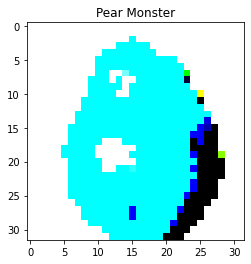

Found 60486 images belonging to 120 classes.
Found 20618 images belonging to 120 classes.


In [12]:
## IMPORT ALL LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from glob import glob

## RESIZE IMAGES
IMAGE_SIZE = [32, 32] 

## TRAINING PARAMETERS
epochs = 1
batch_size = 32

## SPECIFY PATHS
train_path = '/content/MODEL/fruits-360/Training'
valid_path = '/content/MODEL/fruits-360/Test'

## GET THE NUMBER OF FILES
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

## GET NUMBER OF CLASSES
folders = glob(train_path + '/*')

## PRE-PROCESS
vgg = VGG16(input_shape = (32,32,3), weights='imagenet', include_top=False)

## NEED TO CHANGE EXISTING WEIGHTS
for layer in vgg.layers:
  layer.trainable = False

## ADD CUSTOM LAYER AFTER VGG
x = Flatten()(vgg.output)
x = Dense(1500, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

## CREATE MODEL OBJECT
model = Model(inputs=vgg.input, outputs=prediction)

## TO VIEW STRUCTURE OF MODEL
model.summary()

## SET COST AND OPTIMIZATION MODELS
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

## CREATE ImageDataGenerator
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

## LABELS
testgen = gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(testgen.class_indices)
labels = [None] * len(testgen.class_indices)
for k, v in testgen.class_indices.items():
  labels[v] = k

## VGG MAPS ARE 'BGR' 
for x, y in testgen:
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.show()
  break

## CREATE GENERATORS
train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=32,
)

valid_generator = gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=32,
)

In [0]:
## NOW FIT THE MODEL

In [14]:
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files),
  validation_steps=len(valid_image_files)
)

Epoch 1/1
60486/60486 [==============================] - 2613s 43ms/step - loss: 0.6109 - accuracy: 0.9309 - val_loss: 1.2061 - val_accuracy: 0.9014


In [17]:
## CONFUSION MATRIX
def get_confusion_matrix(data_path, N):
  predictions = []
  targets = []

  for x, y in gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=batch_size * 2):
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break
  cm = confusion_matrix(targets, predictions)
  return predictions, targets, cm

predictions = []
targets = []

predictions, targets, cm = get_confusion_matrix(train_path, len(image_files))
print(cm)
valid_cm = get_confusion_matrix(valid_path, len(valid_image_files))
print(valid_cm)

Found 60486 images belonging to 120 classes.
[[270   4   0 ...   0   0   0]
 [  3 415   0 ...   0   0   0]
 [  0   0 470 ...   0   0   0]
 ...
 [  1   2   0 ... 336   0   0]
 [  0   0   0 ...   0 423   0]
 [  0   0   0 ...   0   0 724]]
Found 20618 images belonging to 120 classes.
(array([  0.,   8.,   8., ..., 119., 119., 119.]), array([  0.,   0.,   0., ..., 119., 119., 119.]), array([[ 64,   2,   0, ...,   0,   0,   0],
       [  8, 106,   0, ...,   0,   0,   0],
       [  0,   0, 127, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 112,   0,   0],
       [  0,   0,   0, ...,   0, 123,   0],
       [  0,   0,   0, ...,   0,   0, 247]]))


## PLOT GRAPHS

#LOSS
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

#ACCURACY
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [20]:
## CLASSIFICATION REPORT
print(classification_report(predictions, targets))

              precision    recall  f1-score   support

         0.0       0.55      0.88      0.68       307
         1.0       0.93      0.85      0.89       491
         2.0       0.98      0.99      0.98       475
         3.0       0.98      0.95      0.96       507
         4.0       0.95      0.91      0.93       504
         5.0       0.94      0.99      0.97       467
         6.0       0.88      0.95      0.91       425
         7.0       0.80      0.93      0.86       422
         8.0       0.93      0.82      0.87       558
         9.0       0.99      0.90      0.94       472
        10.0       0.96      0.98      0.97       480
        11.0       0.95      0.90      0.92       519
        12.0       0.97      0.98      0.97       660
        13.0       0.98      0.96      0.97       504
        14.0       0.98      1.00      0.99       420
        15.0       1.00      0.96      0.98       513
        16.0       0.99      0.96      0.98       507
        17.0       0.96    

In [0]:
## SAVE THE MODEL
model.save('fruits365-92%-VGG.h5')